In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score

In [29]:
train1 = pd.read_csv('dataset1/train1.csv')
test1 = pd.read_csv('dataset1/test1.csv')
train2 = pd.read_csv('dataset2/train2.csv')
test2 = pd.read_csv('dataset2/test2.csv')

In [4]:
train1.head()

,Unnamed: 0,initial_list_status,purpose,int_rate,installment,annual_inc,dti,verification_status,grade,revol_bal,inq_last_12m,delinq_2yrs,home_ownership,not_paid,log_inc,verified,grdCtoA
0,1495,w,debt_consolidation,21.45,955.75,90000.0,20.91,Verified,D,23448,4,0,MORTGAGE,1,11.407565,1,0
1,266,w,debt_consolidation,18.06,289.47,65000.0,12.74,Source Verified,D,13362,2,0,MORTGAGE,1,11.082143,1,0
2,309,w,home_improvement,9.44,838.91,97400.0,12.64,Source Verified,B,2372,1,0,MORTGAGE,1,11.486581,1,1
3,239,w,home_improvement,10.42,214.55,60000.0,2.38,Not Verified,B,4705,2,0,OWN,0,11.002100,0,1
4,136,f,debt_consolidation,11.99,1024.52,150000.0,20.84,Not Verified,B,14342,0,0,MORTGAGE,0,11.918391,0,1


In [5]:
train1.corr()

,Unnamed: 0,int_rate,installment,annual_inc,dti,revol_bal,inq_last_12m,delinq_2yrs,not_paid,log_inc,verified,grdCtoA
Unnamed: 0,1.000000,-0.046715,0.002712,0.002880,-0.026111,-0.030930,-0.014902,0.025071,0.020646,0.015489,-0.034222,0.042631
int_rate,-0.046715,1.000000,0.247354,-0.036179,0.208936,0.093976,0.103199,0.060997,0.160727,-0.082376,0.193488,-0.738046
installment,0.002712,0.247354,1.000000,0.295911,0.097890,0.267821,0.048261,0.011995,0.148875,0.352338,0.186881,-0.149601
annual_inc,0.002880,-0.036179,0.295911,1.000000,-0.180486,0.358968,0.131214,-0.025139,-0.058832,0.805361,0.054814,0.032094
dti,-0.026111,0.208936,0.097890,-0.180486,1.000000,0.200485,0.023092,-0.074390,0.077928,-0.283746,0.056063,-0.176415
revol_bal,-0.030930,0.093976,0.267821,0.358968,0.200485,1.000000,-0.024060,-0.060051,0.008821,0.352427,0.070175,-0.076575
inq_last_12m,-0.014902,0.103199,0.048261,0.131214,0.023092,-0.024060,1.000000,-0.014859,-0.002147,0.142970,0.110909,-0.106573
delinq_2yrs,0.025071,0.060997,0.011995,-0.025139,-0.074390,-0.060051,-0.014859,1.000000,0.094444,-0.008682,0.019299,-0.072809
not_paid,0.020646,0.160727,0.148875,-0.058832,0.077928,0.008821,-0.002147,0.094444,1.000000,-0.053348,0.101174,-0.153679
log_inc,0.015489,-0.082376,0.352338,0.805361,-0.283746,0.352427,0.142970,-0.008682,-0.053348,1.000000,0.007769,0.063656


In [6]:
train1['purpose'].unique()

array(['debt_consolidation', 'home_improvement', 'credit_card',
       'small_business', 'major_purchase'], dtype=object)

In [7]:
train1.groupby(['purpose','not_paid'])['Unnamed: 0'].count()

purpose             not_paid
credit_card         0           135
                    1           112
debt_consolidation  0           388
                    1           420
home_improvement    0            68
                    1            58
major_purchase      0            18
                    1            22
small_business      0             8
                    1            15
Name: Unnamed: 0, dtype: int64

In [8]:
train1.groupby(['not_paid'])['Unnamed: 0'].count()

not_paid
0    617
1    627
Name: Unnamed: 0, dtype: int64

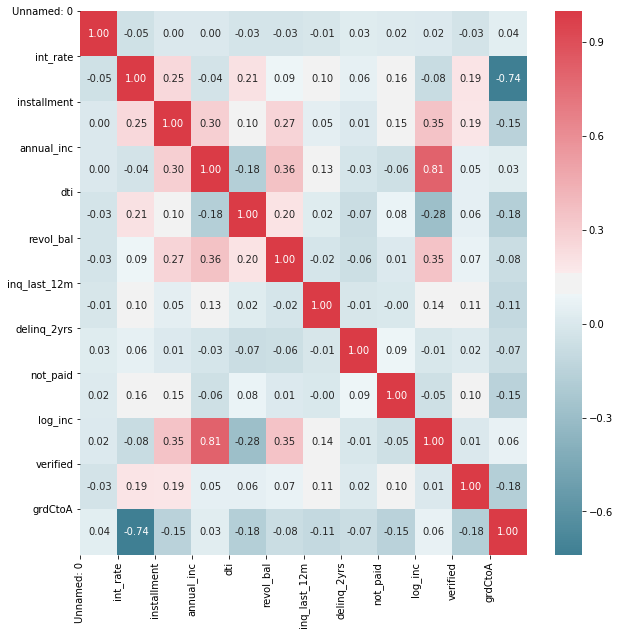

In [9]:
#Create Correlation df
corr = train1.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
#Generate Color Map, red & blue
colormap = sns.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [20]:
#train1[['purpose', 'int_rate', 'installment', 'annual_inc', 'verified', 'home_ownership',  'grdCtoA']]
train1['revol_bal'].unique()

array([23448, 13362,  2372, ..., 23400, 19317,  1137], dtype=int64)

In [30]:
#change any categorical value into new column
train1_onehot = train1[['initial_list_status', 'purpose', 'verification_status', 'home_ownership']]
train1_onehot = pd.get_dummies(train1_onehot)

print(train1_onehot.head())

   initial_list_status_f  initial_list_status_w  purpose_credit_card  \
0                      0                      1                    0   
1                      0                      1                    0   
2                      0                      1                    0   
3                      0                      1                    0   
4                      1                      0                    0   

   purpose_debt_consolidation  purpose_home_improvement  \
0                           1                         0   
1                           1                         0   
2                           0                         1   
3                           0                         1   
4                           1                         0   

   purpose_major_purchase  purpose_small_business  \
0                       0                       0   
1                       0                       0   
2                       0                       0   


In [31]:
train1_final = pd.concat([train1, train1_onehot], axis=1)
train1_final = train1_final.drop(['initial_list_status', 'purpose', 'verification_status', 'home_ownership'], axis=1)

train1_final.columns

Index(['Unnamed: 0', 'int_rate', 'installment', 'annual_inc', 'dti', 'grade',
       'revol_bal', 'inq_last_12m', 'delinq_2yrs', 'not_paid', 'log_inc',
       'verified', 'grdCtoA', 'initial_list_status_f', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'home_ownership_MORTGAGE', 'home_ownership_OWN', 'home_ownership_RENT'],
      dtype='object')

Q4 and Q5 Question

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [43]:
final_model = LogisticRegression()
final_model.fit(
    train1_final[['int_rate', 'installment', 'annual_inc',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'home_ownership_MORTGAGE', 'home_ownership_OWN', 'home_ownership_RENT', 'grdCtoA']],
    train1_final['not_paid']
)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
pd.DataFrame(
    final_model.coef_.astype(float),
    columns=['int_rate', 'installment', 'annual_inc',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business', 'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'home_ownership_MORTGAGE', 'home_ownership_OWN', 'home_ownership_RENT', 'grdCtoA']
)

,int_rate,installment,annual_inc,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_major_purchase,purpose_small_business,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,grdCtoA
0,0.010296,0.000903,-0.000006,-0.001595,-0.000571,-0.000732,0.000167,0.000347,-0.003675,0.000056,0.001234,-0.00293,0.000925,-0.00038,-0.005095


In [34]:
for col in ['purpose','home_ownership']:
    le1 = LabelEncoder().fit(train1[col])
    train1[col] = le1.transform(train1[col])
    test1[col] = le1.transform(test1[col])
    
train1.head()

,Unnamed: 0,initial_list_status,purpose,int_rate,installment,annual_inc,dti,verification_status,grade,revol_bal,inq_last_12m,delinq_2yrs,home_ownership,not_paid,log_inc,verified,grdCtoA
0,1495,w,1,21.45,955.75,90000.0,20.91,Verified,D,23448,4,0,0,1,11.407565,1,0
1,266,w,1,18.06,289.47,65000.0,12.74,Source Verified,D,13362,2,0,0,1,11.082143,1,0
2,309,w,2,9.44,838.91,97400.0,12.64,Source Verified,B,2372,1,0,0,1,11.486581,1,1
3,239,w,2,10.42,214.55,60000.0,2.38,Not Verified,B,4705,2,0,1,0,11.002100,0,1
4,136,f,1,11.99,1024.52,150000.0,20.84,Not Verified,B,14342,0,0,0,0,11.918391,0,1


In [41]:
model1 = LogisticRegression()
model1.fit(
    train1[['purpose', 'int_rate', 'installment', 'annual_inc', 'verified', 'home_ownership',  'grdCtoA']],
    train1['not_paid']
)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
pd.DataFrame(
    model1.coef_.astype(float),
    columns=['purpose', 'int_rate', 'installment', 'annual_inc', 'verified', 'home_ownership',  'grdCtoA']
)

,purpose,int_rate,installment,annual_inc,verified,home_ownership,grdCtoA
0,-0.000321,0.009102,0.000922,-0.000006,0.00151,0.000019,-0.006316


In [ ]:
97 / (97+54)

Dataset 2

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
train2.head()

In [ ]:
for col in ['checking_balance','credit_history','purpose','savings_balance','employment_duration','other_credit','housing','job','phone','default']:
    le2 = LabelEncoder().fit(train2[col])
    train2[col] = le2.transform(train2[col])
    test2[col] = le2.transform(test2[col])

In [ ]:
model2 = DecisionTreeClassifier()
model2.fit(train2.drop(['Unnamed: 0','default'],axis=1), train2['default'])

In [ ]:
pd.DataFrame(
    {'importance': model2.feature_importances_,
    'variable': ['checking_balance', 'months_loan_duration',
       'credit_history', 'purpose', 'amount', 'savings_balance',
       'employment_duration', 'percent_of_income', 'years_at_residence', 'age',
       'other_credit', 'housing', 'existing_loans_count', 'job', 'dependents',
       'phone']
    }
).sort_values(by='importance',ascending=False)

In [ ]:
16+12

In [ ]:
tp = 15
fp = 12
tn = 57
fn = 16

precision = tp / (tp+fp)
recall = tp / (tp+fn)

In [ ]:
precision, recall

In [ ]:
tp = 93
fp = 54
tn = 68
fn = 97

precision = tp / (tp+fp)
recall = tp / (tp+fn)

precision, recall